# Importation et visualisation des données

In [1]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None)
df.columns = ['label', 'content']

df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
print("Nombre de lignes au total ={}\nnombre d'emails spam ={}\nnombre d'emails non-spam {} ".format(len(df),
                                                       len(df[df['label']=='spam']),
                                                       len(df[df['label']=='ham'])))

Nombre de lignes au total =5572
nombre d'emails spam =747
nombre d'emails non-spam 4825 


In [3]:
print("Nombre de labels avec une valeur nulle: {}".format(df['label'].isnull().sum()))
print("Nombre d'emails avec une valeur nulle: {}".format(df['content'].isnull().sum()))

Nombre de labels avec une valeur nulle: 0
Nombre d'emails avec une valeur nulle: 0


# Préparation et nettoyage de données 

In [4]:
import nltk
import re
import string
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
en_stopwords = nltk.corpus.stopwords.words('english')

In [5]:
def clean_email(email):
    result = "".join([word for word in email if word not in string.punctuation])
    tokens = re.split('\W+', result)
    text = [word for word in tokens if word not in en_stopwords]
    
    return text

df['Content_NO_Stopwords'] = df['content'].apply(lambda x: clean_email(x.lower()))

df.head()

,label,content,Content_NO_Stopwords
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [6]:
def lemmatizing(words):
    result = " ".join([wn.lemmatize(word) for word in words])
    return result

df['Content_lemmatized'] = df['Content_NO_Stopwords'].apply(lambda x: lemmatizing(x))



In [7]:
def stemming(words):
    result =" ".join([ps.stem(word) for word in words]) 
    return result

df['Content_Stemmed'] = df['Content_NO_Stopwords'].apply(lambda x: stemming(x))

df.head()

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though


# Vectorisation

## count-vectorize

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorisation_full = CountVectorizer(analyzer=clean_email)
vect_final = vectorisation_full.fit_transform(df['Content_Stemmed'])
print(vect_final.shape)

(5572, 8084)


In [9]:
df_vect_final  = pd.DataFrame(vect_final.toarray())

In [10]:
df_vect_final

,0,1,2,3,4,5,6,7,8,9,...,8074,8075,8076,8077,8078,8079,8080,8081,8082,8083
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## n-grames

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vectorisation = CountVectorizer(ngram_range=(2,2))
vect_final1 = ngram_vectorisation.fit_transform(df['Content_Stemmed'])
print(vect_final1.shape)

(5572, 31308)


In [12]:
de_vect_final = pd.DataFrame(vect_final1.toarray())
de_vect_final.columns = ngram_vectorisation.get_feature_names_out()



In [13]:
de_vect_final

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## TF-IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorisation = TfidfVectorizer(analyzer=clean_email)
tfidf_final = tfidf_vectorisation.fit_transform(df['Content_Stemmed'])
print(tfidf_final.shape)


(5572, 8084)


In [15]:
print(tfidf_vectorisation.get_feature_names_out())

['' '0' '008704050406' ... 'ü' 'üll' '〨ud']


In [16]:
df_tfidf_final = pd.DataFrame(tfidf_final.toarray())
df_tfidf_final.columns = tfidf_vectorisation.get_feature_names_out()


In [17]:
df_tfidf_final

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33524,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [18]:
df0 = df[0:5]
tfidf_vectorisation0 = TfidfVectorizer(analyzer=clean_email)
tfidf_final0 = tfidf_vectorisation0.fit_transform(df0['Content_Stemmed'])
df_tfidf_final0 = pd.DataFrame(tfidf_final0.toarray())
df_tfidf_final0.columns = tfidf_vectorisation0.get_feature_names_out()
df_tfidf_final0

,08452810075over18,2,2005,21st,87121,alreadi,amor,appli,around,avail,...,though,tkt,txt,u,usf,wat,wif,win,wkli,world
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.25,0.00000,0.000000,0.25,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.25,0.000000,0.00000,0.00000,0.25
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.000000,0.00,...,0.000000,0.00000,0.00000,0.339393,0.000000,0.00,0.420669,0.00000,0.00000,0.00
2,0.19245,0.19245,0.19245,0.19245,0.19245,0.000000,0.00,0.19245,0.000000,0.00,...,0.000000,0.19245,0.19245,0.000000,0.000000,0.00,0.000000,0.19245,0.19245,0.00
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.293564,0.00,0.00000,0.000000,0.00,...,0.000000,0.00000,0.00000,0.473691,0.000000,0.00,0.000000,0.00000,0.00000,0.00
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00,0.00000,0.353553,0.00,...,0.353553,0.00000,0.00000,0.000000,0.353553,0.00,0.000000,0.00000,0.00000,0.00


## feature engenering

In [19]:
df['Content_len'] = df['content'].apply(lambda x: len(x) - x.count(" "))

df.head()

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed,Content_len
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,92
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,128
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though,49


In [20]:
def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation] 
    nb_ponctuation = sum(binary_array)
    total = len(text) - text.count(" ")
    return round(nb_ponctuation/(total), 4)*100

df['punctuation_rate'] = df['content'].apply(lambda x: count_punctuation(x))

df.head()

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed,Content_len,punctuation_rate
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,92,9.78
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.69
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though,49,4.08


In [21]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

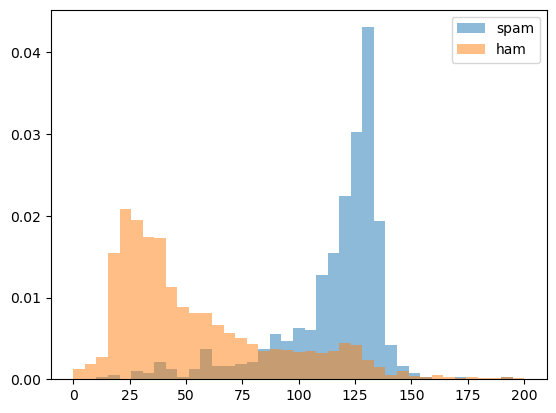

In [22]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 200, 40)

plt.hist(df[df['label']=='spam']['Content_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(df[df['label']=='ham']['Content_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper right')
plt.show()


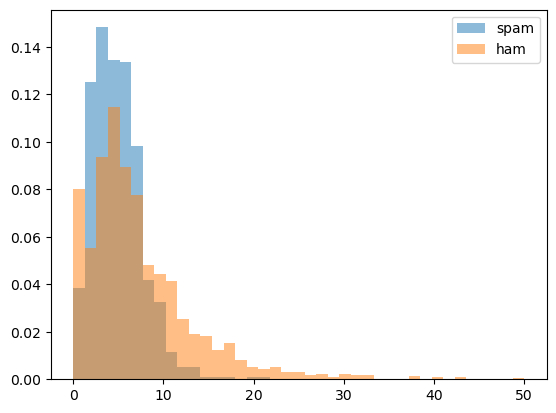

In [23]:
bins = np.linspace(0, 50, 40)

pyplot.hist(df[df['label']=='spam']['punctuation_rate'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(df[df['label']=='ham']['punctuation_rate'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Modèles de maching learning

## SVM

In [24]:
all_data = pd.concat([pd.DataFrame(vect_final.toarray()), df['Content_len'], df['punctuation_rate']], axis=1)

In [25]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,8076,8077,8078,8079,8080,8081,8082,8083,Content_len,punctuation_rate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,92,9.78
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,25.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,4.69
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,15.38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,131,6.11
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,29,3.45
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,14.58
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1.00


In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(all_data, df['label'], test_size=0.2)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [28]:
from sklearn  import svm

In [29]:
alg_svm= svm.SVC(kernel = 'linear')

In [30]:
alg_svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [31]:
predictions = alg_svm.predict(X_test)

In [32]:
precision, recall, fscore, _ = score(Y_test, predictions, pos_label='spam', average='binary')

In [33]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((predictions==Y_test).sum() / len(predictions),3)))

Precision: 0.977 / Recall: 0.866 / Accuracy: 0.979


In [34]:
fscore

0.9181494661921707

In [35]:
precision

0.9772727272727273

## SVM avec K-FOLD

In [36]:
from sklearn.model_selection import KFold, cross_val_score

In [37]:
from sklearn  import svm
all_data.columns = all_data.columns.astype(str)
alg_svm_cross_validation= svm.SVC(kernel = 'linear')
   
k_fold = KFold(n_splits=4)
cross_val_score(alg_svm_cross_validation, all_data, df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97631012, 0.98420675, 0.977028  , 0.98205312])

## SVM avec TF-IDF

In [38]:

all_data1 = pd.concat([pd.DataFrame(tfidf_final.toarray()), df['Content_len'], df['punctuation_rate']], axis=1)

In [39]:
all_data1

,0,1,2,3,4,5,6,7,8,9,...,8076,8077,8078,8079,8080,8081,8082,8083,Content_len,punctuation_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,92,9.78
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,24,25.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,128,4.69
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,39,15.38
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,49,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,131,6.11
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.33524,0.0,0.0,29,3.45
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,48,14.58
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,100,1.00


In [40]:
all_data1.columns = all_data1.columns.astype(str)

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [42]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(all_data1, df['label'], test_size=0.2)

In [43]:
from sklearn  import svm

In [44]:
alg_svm= svm.SVC(kernel = 'linear')

In [45]:
alg_svm.fit(X_train1, Y_train1)

SVC(kernel='linear')

In [46]:
predictions = alg_svm.predict(X_test1)

In [47]:
precision1, recall1, fscore1, _ = score(Y_test1, predictions, pos_label='spam', average='binary')

In [48]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision1, 3),
                                                        round(recall1, 3),
                                                        round((predictions==Y_test1).sum() / len(predictions),3)))

Precision: 0.979 / Recall: 0.89 / Accuracy: 0.982


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

alg_RandomForest = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
model = alg_RandomForest.fit(X_train, Y_train)

In [50]:
predictions = model.predict(X_test)
precision, recall, fscore, support = score(Y_test, predictions, pos_label='spam', average='binary')

In [51]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((predictions==Y_test).sum() / len(predictions),3)))

Precision: 1.0 / Recall: 0.557 / Accuracy: 0.941


In [52]:
from sklearn.ensemble import RandomForestClassifier

alg_RandomForest = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
   
k_fold = KFold(n_splits=4)
cross_val_score(alg_RandomForest, all_data, df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.93898062, 0.94831299, 0.94400574, 0.94185212])

# Apprentissage non supervisé 

In [53]:
from sklearn.cluster import KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [55]:
predictions = kmeans.predict(all_data)

df['kmeans_predictions'] = predictions




In [56]:
df

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed,Content_len,punctuation_rate,kmeans_predictions
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,92,9.78,1
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni,24,25.00,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.69,1
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say,39,15.38,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though,49,4.08,0
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time tried 2 contact u u 750 pound prize 2...,2nd time tri 2 contact u u 750 pound prize 2 c...,131,6.11,1
5568,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",ü b going esplanade fr home,ü b go esplanad fr home,29,3.45,0
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]",pity mood soany suggestion,piti mood soani suggest,48,14.58,0
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...,guy bitch act like id interest buy someth els ...,100,1.00,1


In [86]:
df1=df.copy()

In [87]:
df1

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed,Content_len,punctuation_rate,kmeans_predictions
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,92,9.78,1
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni,24,25.00,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.69,1
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say,39,15.38,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though,49,4.08,0
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time tried 2 contact u u 750 pound prize 2...,2nd time tri 2 contact u u 750 pound prize 2 c...,131,6.11,1
5568,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",ü b going esplanade fr home,ü b go esplanad fr home,29,3.45,0
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]",pity mood soany suggestion,piti mood soani suggest,48,14.58,0
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...,guy bitch act like id interest buy someth els ...,100,1.00,1


In [96]:
# Supposons que df['label'] contient les étiquettes réelles
df1['label_bin'] = df1['label'].map({'spam': 1, 'ham': 0})



In [97]:
df1

,label,content,Content_NO_Stopwords,Content_lemmatized,Content_Stemmed,Content_len,punctuation_rate,kmeans_predictions,label_bin
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,92,9.78,1,0
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni,ok lar joke wif u oni,24,25.00,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.69,1,1
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say,39,15.38,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think go usf life around though,nah dont think goe usf live around though,49,4.08,0,0
...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time tried 2 contact u u 750 pound prize 2...,2nd time tri 2 contact u u 750 pound prize 2 c...,131,6.11,1,1
5568,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]",ü b going esplanade fr home,ü b go esplanad fr home,29,3.45,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]",pity mood soany suggestion,piti mood soani suggest,48,14.58,0,0
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...,guy bitch act like id interest buy someth els ...,100,1.00,1,0


In [98]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df1['label_bin'], df1['kmeans_predictions'])

In [99]:
accuracy

0.7941493180186647